In [1]:
%pylab inline
%load_ext autoreload
%autoreload 2

Populating the interactive namespace from numpy and matplotlib


In [2]:
import time
import sys
sys.path.insert(0,'../../../..')
from omama import gp2
from omama.gp2 import Runner
from keras import losses, metrics
from tensorflow.keras import optimizers

In [3]:
R = Runner(classifier='kattunet2d',
           filter_num=[16, 32, 64, 128, 256],
           stack_num_down=2,
           stack_num_up=2,
           activation='ReLU',
           atten_activation='ReLU',
           attention='add',
           output_activation='Sigmoid',
           batch_norm=False,
           pool=False,
           unpool=False,
           weights='imagenet',
           optimizer= None, #None = default is optimizers.Adam(learning_rate=1e-3)
           loss=None, #None = default is losses.binary_crossentropy
           metric=None # None = default is Util.dice_coef
          )

*** GP2 KATTUnet2D ***
Working directory: /tmp/tmppe4_3pr4GP2


In [4]:
# load our larger toy dataset (10k images and masks)
images = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_images_unn.npy')
masks = np.load('/hpcstor6/scratch01/p/poornendu.pabbati001/COVID/Covid_masks_unn.npy')

In [5]:
images.shape

(3616, 512, 512, 1)

In [6]:
masks.shape

(3616, 512, 512, 1)

In [7]:
# weights = {
#     'A': 0.5,
#     'A_train': 0.1,
#     'A_val': 0.3,
#     'A_test': 0.6,
#     'B': 0.3,
#     'B_train': 0.7,
#     'B_val': 0.1,
#     'B_test': 0.2,
#     'Z': 0.2
# }

In [7]:
R.run(images=images, masks=masks, runs=8)

Weights OK!
******
Loop 1
Epoch 1/100
3/3 [==============================] - 27s 6s/step - loss: 5.8241 - dice_coeff: 0.4452 - val_loss: 3.9523 - val_dice_coeff: 0.4400
Epoch 2/100
3/3 [==============================] - 3s 1s/step - loss: 3.0149 - dice_coeff: 0.4306 - val_loss: 1.2881 - val_dice_coeff: 0.3928
Epoch 3/100
3/3 [==============================] - 3s 1s/step - loss: 0.9248 - dice_coeff: 0.3471 - val_loss: 0.7322 - val_dice_coeff: 0.2305
Epoch 4/100
3/3 [==============================] - 3s 1s/step - loss: 0.8543 - dice_coeff: 0.1671 - val_loss: 1.0482 - val_dice_coeff: 0.1107
Epoch 5/100
3/3 [==============================] - 3s 1s/step - loss: 1.1227 - dice_coeff: 0.0892 - val_loss: 1.1791 - val_dice_coeff: 0.0837
Epoch 6/100
3/3 [==============================] - 3s 1s/step - loss: 1.2014 - dice_coeff: 0.0761 - val_loss: 1.1506 - val_dice_coeff: 0.0877
Model saved to: /tmp/tmppe4_3pr4GP2/attunet_0attunet_model
History saved to: /tmp/tmppe4_3pr4GP2/attunet_history_0.pkl
Te

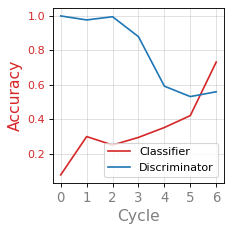

In [8]:
R.plot()

In [9]:
R.classifier_scores

[[0.2968302369117737, 0.5300824642181396],
 [0.182675302028656, 0.7841244339942932],
 [0.15716376900672913, 0.8109405636787415],
 [0.16013570129871368, 0.8051509261131287]]

In [10]:
R.discriminator_scores

[[0.0, 1.0],
 [236.58493041992188, 0.6203703880310059],
 [339.5798645019531, 0.5648148059844971],
 [484.7742919921875, 0.49074074625968933]]

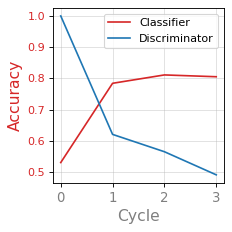

In [11]:
R.plot()